#### Student Performance Indicator

##### Life cycle of Machine Learning Project

1. Understanding the problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training 
7. Choose best model

##### 1) Problem Statement
1. This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

##### 2) Data Collection

1. Dataset Source - https://www.kaggle.com/datasets/rdeb26/stud-csv
2. The data consists of 8 column and 1000 rows

##### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import CSV Data as Pandas Dataframe

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of the dataset

In [4]:
df.shape

(1000, 8)

#### 2.2 Dataset Information
1. Gender: sex of studnets -> (Male/female)
2. race/ethnicity: ethnicity of students -> (Group A, B, C, D, E)
3. parental level of education: parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
4. lunch: having lunch before test(standard or free/reduced)
5. test prepartion course : complete or not complete before test
6. math score
7. reading score
8. writing score


##### 3. Data Checks to perform
1. Check Missing values
2. Check Duplicate
3. Check data type
4. Check the number unique values of each column
5. Check statistics of dataset
6. Check various categories present in the different categorical column

##### 3.1 Check Missing values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### 3.3 Check Duplicates

In [7]:
df.duplicated().sum()

0

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 3.4 Check the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 3.7 Exploring Data

In [13]:
print("Categorical in 'gender' variable ", end="")
print(df['gender'].unique())


print("Categorical in 'race_ethnicity' variable ", end="")
print(df['race_ethnicity'].unique())

print("Categorical in 'parental level of education' variable ", end="")
print(df['parental_level_of_education'].unique())

print("Categorical in 'test preparation course' variable ", end="")
print(df['test_preparation_course'].unique())

Categorical in 'gender' variable ['female' 'male']
Categorical in 'race_ethnicity' variable ['group B' 'group C' 'group A' 'group D' 'group E']
Categorical in 'parental level of education' variable ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorical in 'test preparation course' variable ['none' 'completed']


In [15]:
# Define numerical & categorical columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Print columns
print(f'We have {len(numeric_features)} numerical features: {numeric_features}')
print(f'\nWe have {len(categorical_features)} categorical features: {categorical_features}')


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.8 Adding columns for "Total Score" and "Average"

In [17]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] =df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of studnts with full marks in Maths: {math_full}')
print(f'Number of studnts with full marks in Writing: {writing_full}')
print(f'Number of studnts with full marks in Reading: {reading_full}')



Number of studnts with full marks in Maths: 7
Number of studnts with full marks in Writing: 14
Number of studnts with full marks in Reading: 17


In [20]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of studnts with less than 20 marks in Maths: {math_less_20}')
print(f'Number of studnts with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of studnts with less than 20 marks in Reading: {reading_less_20}')


Number of studnts with less than 20 marks in Maths: 4
Number of studnts with less than 20 marks in Writing: 3
Number of studnts with less than 20 marks in Reading: 1


#### 4.1 Exploring Data(Visualization)

#### 4.1.1 Histogram & KDE

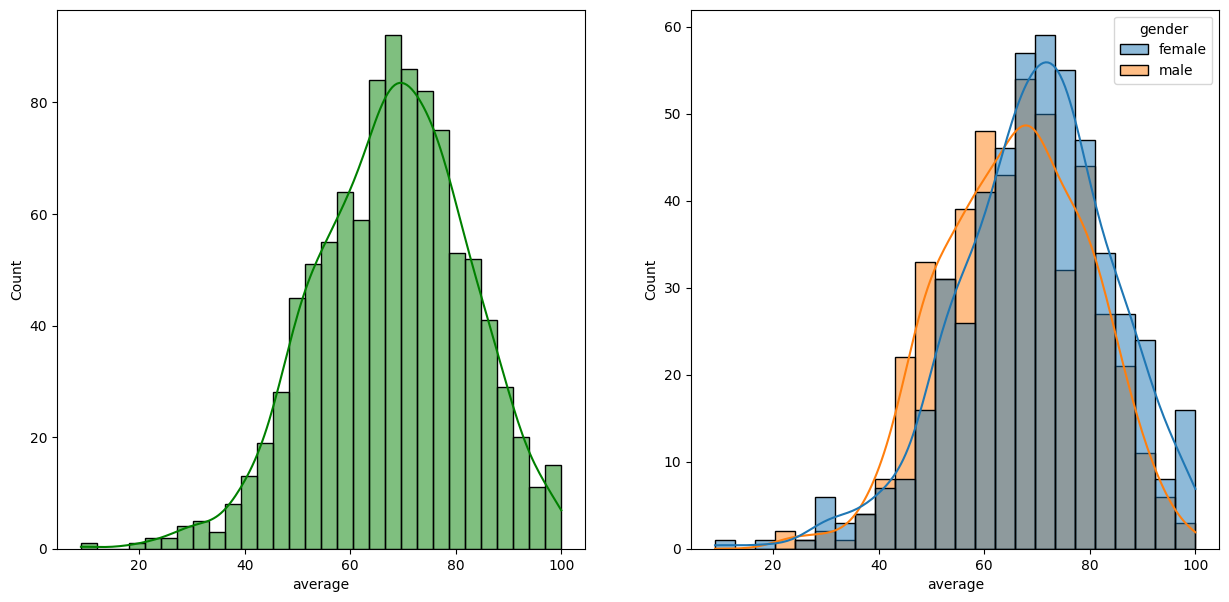

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x ='average', bins = 30, kde = True, color='g')
plt.subplot(122)
sns.histplot(data=df, x = 'average', kde=True, hue='gender')
plt.show()

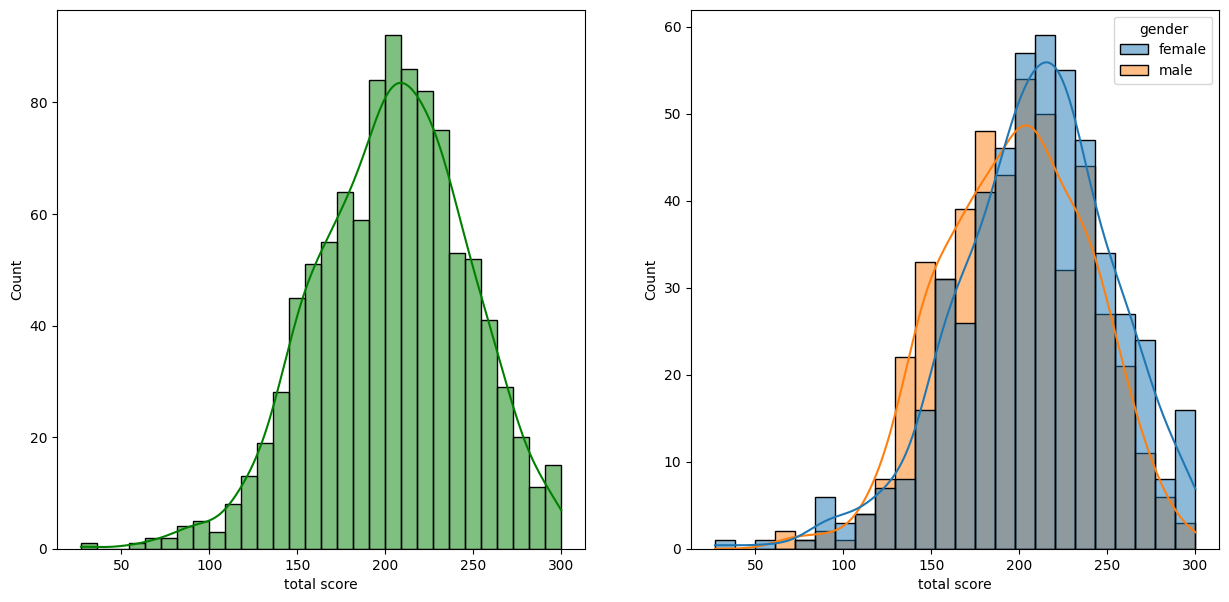

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x ='total score', bins = 30, kde = True, color='g')
plt.subplot(122)
sns.histplot(data=df, x = 'total score', kde=True, hue='gender')
plt.show()

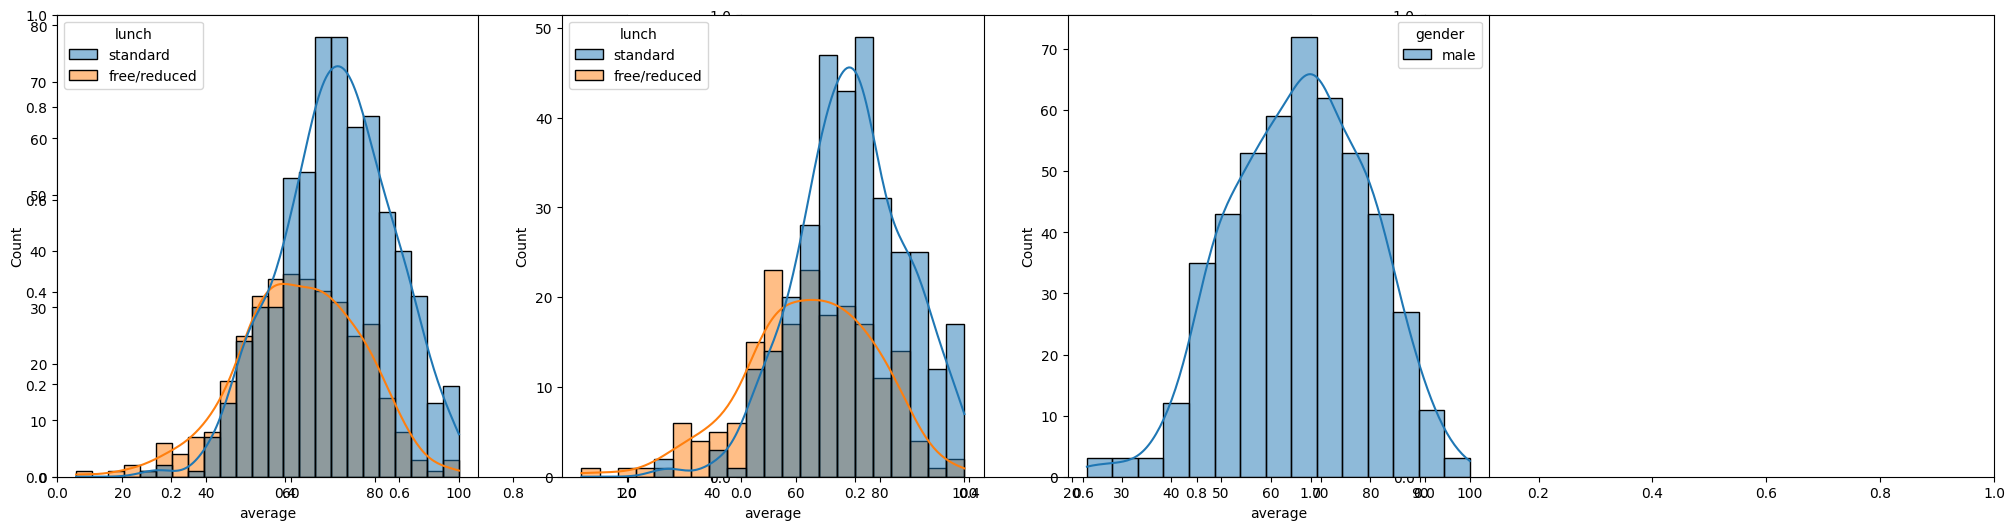

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x ='average', kde = True, hue ='lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x= 'average', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x = 'average', kde=True, hue='gender')
plt.show()